In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


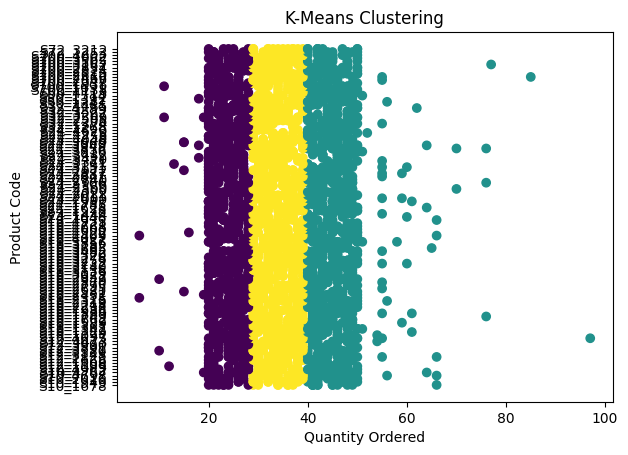

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

excel_file_path = r'C:\Users\minnu\OneDrive\Documents\jupyternotebookfolder\sales_data_sample.xlsx'
df = pd.read_excel(excel_file_path)

selected_columns = ['QUANTITYORDERED', 'PRODUCTCODE', 'DEALSIZE']
df_selected = df[selected_columns]

numeric_features = ['QUANTITYORDERED']
categorical_features = ['PRODUCTCODE']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

k = 3


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=k, random_state=42))
])


pipeline.fit(df_selected)

df['Cluster'] = pipeline.named_steps['kmeans'].labels_

plt.scatter(df['QUANTITYORDERED'], df['PRODUCTCODE'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Code')
plt.show()